### Loading and Exploring the Dataset

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = 'data/concrete.csv'
df = pd.read_csv(file_path)


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'strength'],
      dtype='object')

In [4]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)' : 'cement_component_mixture',
                     'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'blast_furnace_slag_mixture',
                     'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly_ash_component_mixture',
                     'Water  (component 4)(kg in a m^3 mixture)' : 'water_component_mixture',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'superplasticizer_component_mixture',
                     'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarse_aggregate_mixture',
                     'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine_aggregate_mixture',
                     'Age (day)' : 'age'
                    }, inplace=True)

In [5]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cement_component_mixture            1030 non-null   float64
 1   blast_furnace_slag_mixture          1030 non-null   float64
 2   fly_ash_component_mixture           1030 non-null   float64
 3   water_component_mixture             1030 non-null   float64
 4   superplasticizer_component_mixture  1030 non-null   float64
 5   coarse_aggregate_mixture            1030 non-null   float64
 6   fine_aggregate_mixture              1030 non-null   float64
 7   age                                 1030 non-null   int64  
 8   strength                            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
# Display the first few rows of the dataset
df.head()


,cement_component_mixture,blast_furnace_slag_mixture,fly_ash_component_mixture,water_component_mixture,superplasticizer_component_mixture,coarse_aggregate_mixture,fine_aggregate_mixture,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data Preprocessing

In [7]:
# Check for missing values
df.isnull().sum()

cement_component_mixture              0
blast_furnace_slag_mixture            0
fly_ash_component_mixture             0
water_component_mixture               0
superplasticizer_component_mixture    0
coarse_aggregate_mixture              0
fine_aggregate_mixture                0
age                                   0
strength                              0
dtype: int64

In [8]:
# Descriptive statistics to identify outliers
df.describe()

,cement_component_mixture,blast_furnace_slag_mixture,fly_ash_component_mixture,water_component_mixture,superplasticizer_component_mixture,coarse_aggregate_mixture,fine_aggregate_mixture,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.shape

(1030, 9)

### Distribution Analysis and Standardization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

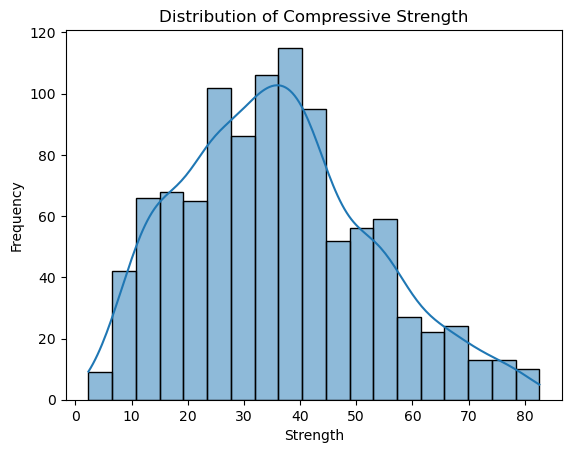

In [11]:
# Plot distribution of the target variable
sns.histplot(df['strength'], kde=True)
plt.title('Distribution of Compressive Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

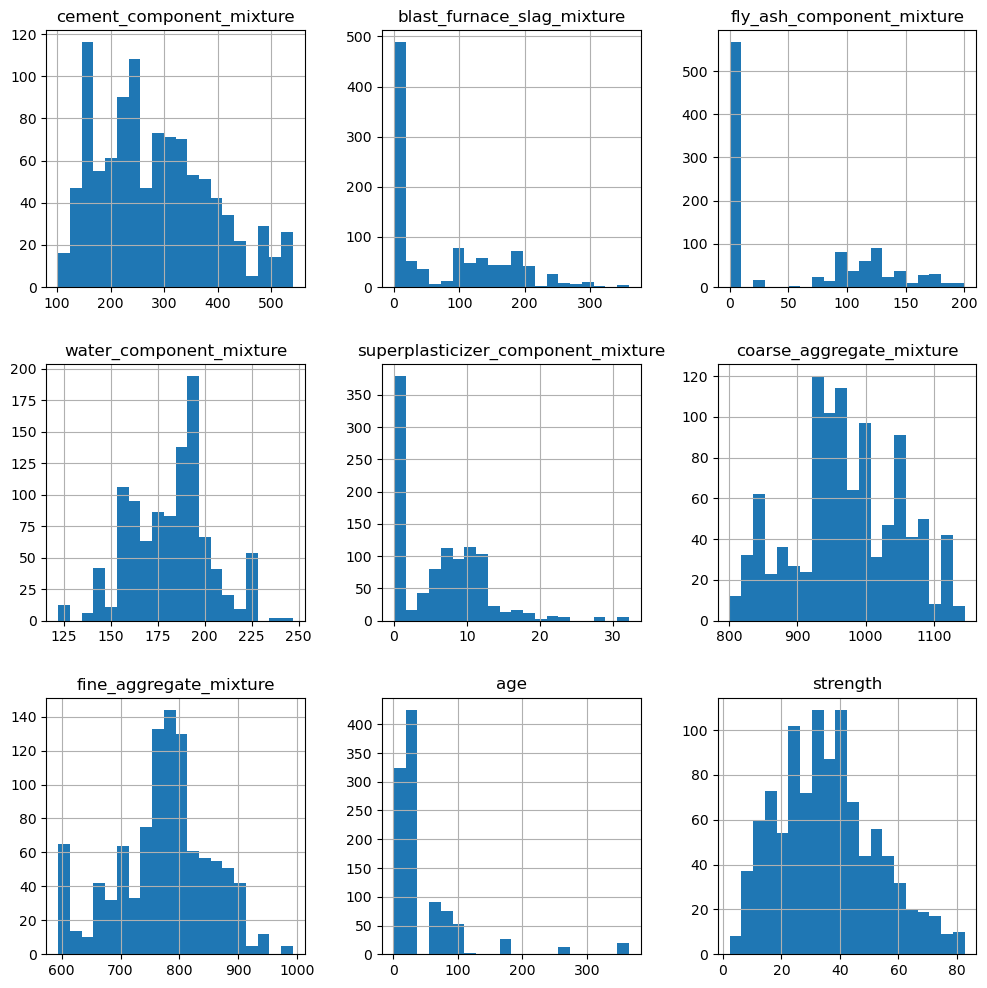

In [12]:
# Plot distribution of other features
df.hist(figsize=(12, 12), bins=20)
plt.show()

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Model Selection:
* Linear Regression
* Random Forest Regressor
* Gradient Boosting Regressor

### Model Training

In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_scaled.drop('strength', axis=1)
y = df_scaled['strength']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Evaluation Metrics

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluation
metrics = {
    'Linear Regression': {
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'MSE': mean_squared_error(y_test, y_pred_lr),
        'RMSE': mean_squared_error(y_test, y_pred_lr, squared=False),
        'R2': r2_score(y_test, y_pred_lr)
    },
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'RMSE': mean_squared_error(y_test, y_pred_rf, squared=False),
        'R2': r2_score(y_test, y_pred_rf)
    },
    'XGBoost': {
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'MSE': mean_squared_error(y_test, y_pred_xgb),
        'RMSE': mean_squared_error(y_test, y_pred_xgb, squared=False),
        'R2': r2_score(y_test, y_pred_xgb)
    }
}

print("-------Metrics--------------")
metrics


{'Linear Regression': {'MAE': 0.46387176228815724,
  'MSE': 0.3442152133187917,
  'RMSE': 0.5866985710897817,
  'R2': 0.627553179231485},
 'Random Forest': {'MAE': 0.22220839994761557,
  'MSE': 0.10638294155912803,
  'RMSE': 0.32616397955495946,
  'R2': 0.8848918152522084},
 'XGBoost': {'MAE': 0.18089415174333615,
  'MSE': 0.07717611579222808,
  'RMSE': 0.2778058958917684,
  'R2': 0.9164941064372505}}

### Feature Importance:

In [18]:
# Feature importance for Random Forest
rf_importances = rf_reg.feature_importances_

# Feature importance for XGBoost
xgb_importances = xgb_reg.feature_importances_

# Create a DataFrame for easier interpretation
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_importances,
    'XGB Importance': xgb_importances
})

print("---------Important Features -----------")
feature_importance_df


,Feature,RF Importance,XGB Importance
0,cement_component_mixture,0.324494,0.210226
1,blast_furnace_slag_mixture,0.076647,0.149195
2,fly_ash_component_mixture,0.018041,0.050162
3,water_component_mixture,0.126380,0.163892
4,superplasticizer_component_mixture,0.056714,0.127628
5,coarse_aggregate_mixture,0.028740,0.029712
6,fine_aggregate_mixture,0.035198,0.056093
7,age,0.333786,0.213092


### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Params = ", best_params)
print("Best Score = ", best_score)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Params =  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score =  0.9020054825437742


### Comparative Analysis

In [20]:
comparison = pd.DataFrame(metrics)
comparison


,Linear Regression,Random Forest,XGBoost
MAE,0.463872,0.222208,0.180894
MSE,0.344215,0.106383,0.077176
RMSE,0.586699,0.326164,0.277806
R2,0.627553,0.884892,0.916494
